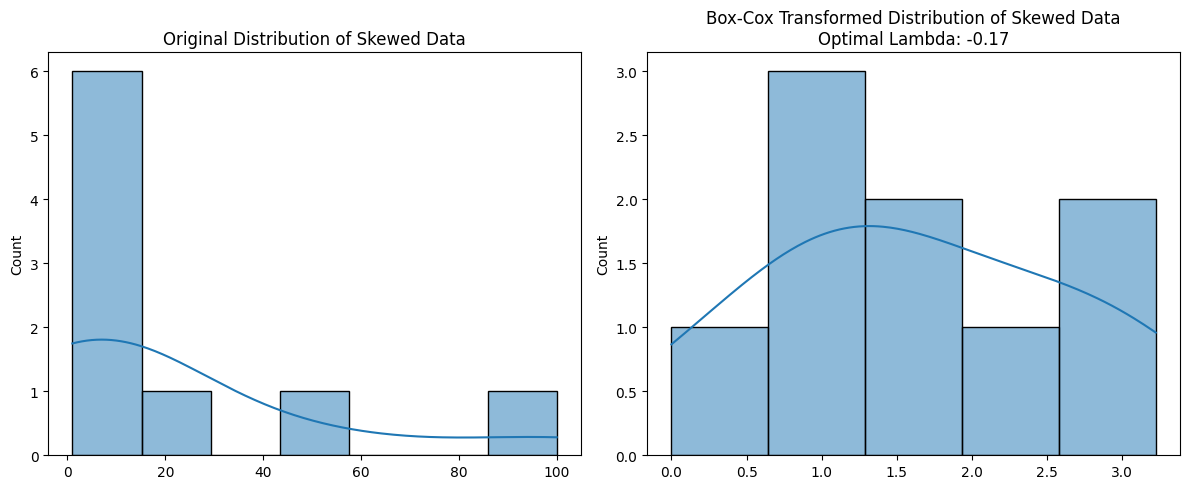

Box-Cox Transformed Skewed Data: [0.         0.65486171 1.00451138 1.2387389  1.41289244]...
Optimal Lambda for Skewed Data: -0.17

---


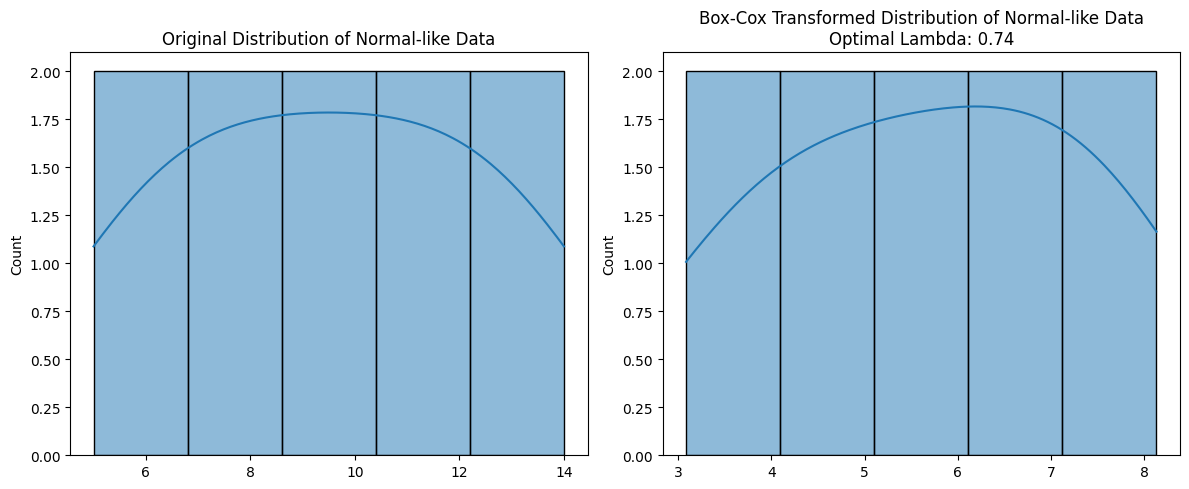

Box-Cox Transformed Normal-like Data: [3.08537274 3.72407411 4.33521591 4.92371511 5.49310845]...
Optimal Lambda for Normal-like Data: 0.74

---
Error with Non-Positive Data: Box-Cox transformation requires positive input data.


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def power_transform_box_cox(data, column_name="Data"):
    """
    Applies Box-Cox power transformation to a dataset to stabilize variance
    and make the data more normal.

    Args:
        data (list or pandas.Series): The dataset to transform. Must contain positive values.
        column_name (str, optional): The name of the data column for plotting.
                                     Defaults to "Data".

    Returns:
        tuple: A tuple containing:
            - transformed_data (numpy.ndarray): The Box-Cox transformed data.
            - optimal_lambda (float): The optimal lambda value found by the Box-Cox transformation.
    """
    if isinstance(data, list):
        data_series = pd.Series(data)
    elif isinstance(data, pd.Series):
        data_series = data
    else:
        raise ValueError("Input data must be a list or a pandas Series.")

    # Box-Cox requires positive data
    if np.any(data_series <= 0):
        raise ValueError("Box-Cox transformation requires positive input data.")

    transformed_data, optimal_lambda = stats.boxcox(data_series)

    # Visualize original and transformed data
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data_series, kde=True)
    plt.title(f"Original Distribution of {column_name}")

    plt.subplot(1, 2, 2)
    sns.histplot(transformed_data, kde=True)
    plt.title(f"Box-Cox Transformed Distribution of {column_name}\nOptimal Lambda: {optimal_lambda:.2f}")

    plt.tight_layout()
    plt.show()

    return transformed_data, optimal_lambda

if __name__ == '__main__':
    # Example Usage: Positively Skewed Data
    positive_skewed_data = [1, 2, 3, 4, 5, 10, 20, 50, 100]
    try:
        transformed_data_skewed, lambda_skewed = power_transform_box_cox(positive_skewed_data, "Skewed Data")
        print(f"Box-Cox Transformed Skewed Data: {transformed_data_skewed[:5]}...")
        print(f"Optimal Lambda for Skewed Data: {lambda_skewed:.2f}")
    except ValueError as e:
        print(f"Error with Skewed Data: {e}")

    print("\n---")

    # Example Usage: More Normally Distributed Data (for comparison)
    normal_like_data = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    try:
        transformed_data_normal, lambda_normal = power_transform_box_cox(normal_like_data, "Normal-like Data")
        print(f"Box-Cox Transformed Normal-like Data: {transformed_data_normal[:5]}...")
        print(f"Optimal Lambda for Normal-like Data: {lambda_normal:.2f}")
    except ValueError as e:
        print(f"Error with Normal-like Data: {e}")

    print("\n---")

    # Example Usage: Data with Zero or Negative Values (will raise an error)
    non_positive_data = [1, -1, 2, 0, 3]
    try:
        transformed_data_non_positive, lambda_non_positive = power_transform_box_cox(non_positive_data, "Non-Positive Data")
        print(f"Box-Cox Transformed Non-Positive Data: {transformed_data_non_positive[:5]}...")
        print(f"Optimal Lambda for Non-Positive Data: {lambda_non_positive:.2f}")
    except ValueError as e:
        print(f"Error with Non-Positive Data: {e}")